In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [330]:
# Clean data from YouTube comments csv and perform sentiment analysis with a word cloud. Also find
# the most commonly used emojis.

In [261]:

comments = pd.read_csv(r'sample_data/UScomments.csv', error_bad_lines=False)
comments

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8



,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
170626,8bSCIUAeLis,Some one get CHAPSTICK (chadtronic),0,0
170627,8bSCIUAeLis,WHY IS THIS TRENDING,0,0
170628,8bSCIUAeLis,Why tf is this trending???? Oh wait the is tre...,15,4
170629,8bSCIUAeLis,It's trending because of Reddit you fucking mo...,8,1


In [262]:
comments.isnull().sum()

video_id        0
comment_text    1
likes           0
replies         0
dtype: int64

In [316]:
comments = comments.rename(columns={'oKzFGhlFqqE': 'video_id', 'comments': 'comments_text', '0': 'likes', '0.1': 'replies'})


In [314]:
comments.dropna(inplace=True)

In [265]:
!pip install Textblob


In [266]:
from textblob import TextBlob

In [317]:
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0


In [268]:
TextBlob("Logan Paul it's yo big day !!!!").sentiment.polarity

0.0

In [270]:
polarity = []
for comment in comments['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [272]:
len(polarity)

170630

In [273]:
comments['polarity'] = polarity

In [274]:
comments.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0


In [275]:
filter1 = comments['polarity'] == 1

In [276]:
comments_positive = comments[filter1]

In [277]:
filter2 = comments['polarity'] == -1

In [278]:
comments_negative = comments[filter2]

In [279]:
comments_negative

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
169705,rtk-BLeHv6M,Butter chicken!!!!,0,0,-1.0
169734,rtk-BLeHv6M,Fucking disgusting,0,0,-1.0
170371,LnxSTShwDdQ,This product is so damn stupid!! Looks like yo...,0,0,-1.0
170492,S7rQSRGGKSQ,Gabby's awful and has a pidgeotto haircut.,0,0,-1.0


In [281]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [282]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [283]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

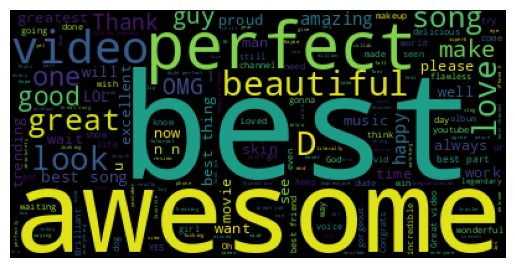

In [284]:
plt.imshow(wordcloud)
plt.axis('off')

In [286]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [287]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

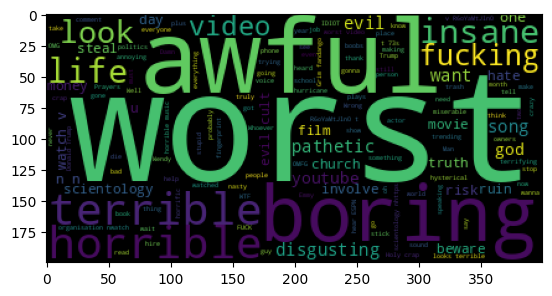

In [288]:
plt.imshow(wordcloud2)

In [289]:
comments_negative.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [ ]:
!pip install emoji

In [290]:
import emoji

In [292]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
170626                  Some one get CHAPSTICK (chadtronic)
170627                                 WHY IS THIS TRENDING
170628    Why tf is this trending???? Oh wait the is tre...
170629    It's trending because of Reddit you fucking mo...
170630                                       Trending? Why?
Name: comment_text, Length: 170630, dtype: object

In [293]:
emoji_list = []
for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)

In [295]:
all_emojis_list = []
for comment in comments['comment_text']:
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emojis_list.append(char)

In [296]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [297]:
from collections import Counter

In [298]:
most_common_emojis = Counter(all_emojis_list).most_common(10)
most_common_emojis

[('😂', 8941),
 ('❤', 7423),
 ('😍', 6568),
 ('😬', 3148),
 ('😭', 2131),
 ('🔥', 1856),
 ('👏', 1491),
 ('💕', 1433),
 ('👍', 1323),
 ('😘', 1293)]

In [299]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [300]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [301]:
freqs

[8941, 7423, 6568, 3148, 2131, 1856, 1491, 1433, 1323, 1293]

In [302]:
import plotly.graph_objs as go

In [303]:
from plotly.offline import iplot

In [304]:
trace = go.Bar(x=emojis, y=freqs)

In [305]:
iplot([trace])

In [333]:
# Export most common emojis to csv and then find which category has the most likes.

In [331]:
data = most_common_emojis
columns = ['emoji', 'number_of_emojis']
df = pd.DataFrame(data, columns=columns)
df.to_csv('output.csv', index=False)

In [349]:
import os

In [350]:
full_df = os.listdir(r'sample_data/additional_data')

In [364]:
json_df = pd.read_json(r'sample_data/additional_data/US_category_id.json')
json_df.head(5)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [371]:
# json_df['category_id'].unique()
json_df['items'][0]


{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [372]:
cat_dict = {}

for item in json_df['items'].values:
    ## cat_dict[key] = value (Syntax to insert key:value in dictionary)
    cat_dict[item['id']] = item['snippet']['title']

cat_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [373]:
full_df = json_df.head(5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Travel & Events'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Pets & Animals'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Shows'),
  Text(10, 0, 'Science & Technology'),
  Text(11, 0, 'Gaming'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Howto & Style'),
  Text(16, 0, 'Trailers')])

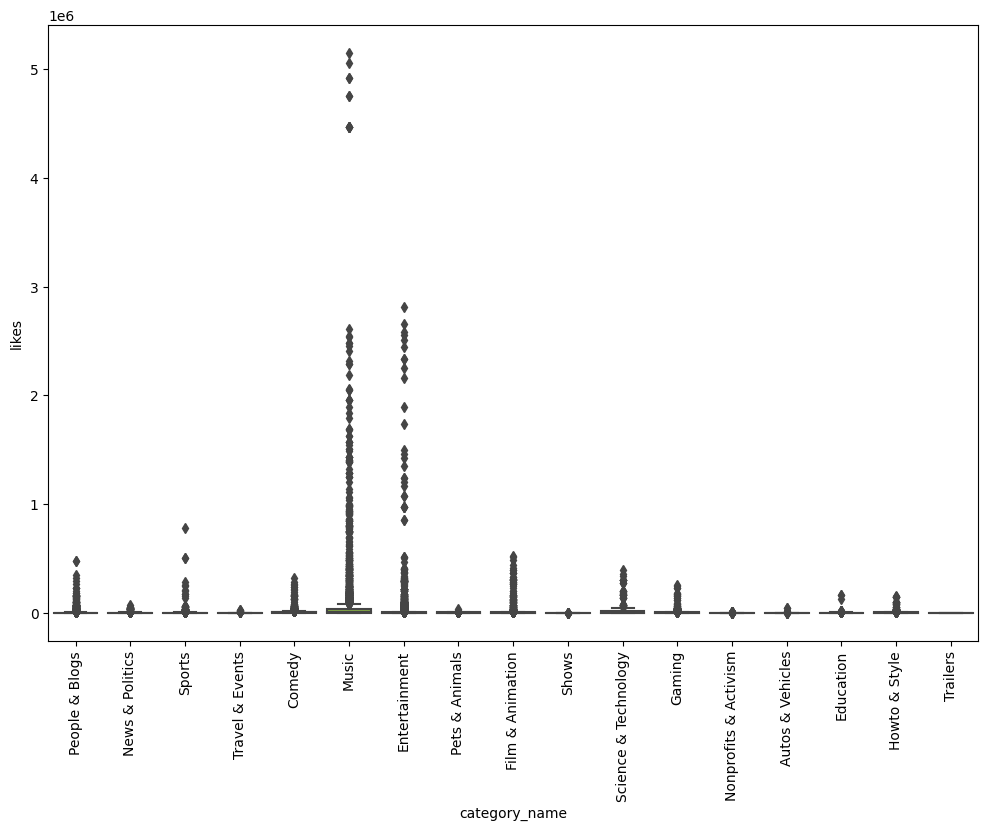

In [335]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name' , y='likes' , data=full_df)
plt.xticks(rotation='vertical')